In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, mean, stddev, max, min, expr, year, month, avg
import seaborn as sns
import matplotlib.pyplot as plt

Initialize SparkSession

In [0]:
spark = SparkSession.builder.appName("EDA").getOrCreate()

Load Dataset

In [0]:
file_path = "dbfs:/FileStore/EV_Population-1.csv"  # Replace with actual file path
df = spark.read.format("csv").option("header", "true").option("inferSchema", "true").load(file_path)


Display Data

In [0]:
print("Data Schema:")
df.printSchema()
print("Sample Data:")
df.show(5)

Data Schema:
root
 |-- State: string (nullable = true)
 |-- Model Year: integer (nullable = true)
 |-- Make: string (nullable = true)
 |-- Electric Vehicle Type: string (nullable = true)
 |-- Electric Range: integer (nullable = true)
 |-- Base MSRP: integer (nullable = true)
 |-- Legislative District: double (nullable = true)
 |-- CAFV Eligibility Simple: string (nullable = true)

Sample Data:
+-----+----------+---------+---------------------+--------------+---------+--------------------+-----------------------+
|State|Model Year|     Make|Electric Vehicle Type|Electric Range|Base MSRP|Legislative District|CAFV Eligibility Simple|
+-----+----------+---------+---------------------+--------------+---------+--------------------+-----------------------+
|   WA|      2020|    TESLA|                  BEV|           266|        0|                46.0|               Eligible|
|   WA|      2024|      BMW|                 PHEV|            39|        0|                46.0|               Eligible

Data Cleaning
# Count & Remove duplicates

In [0]:
duplicate_count = df.count() - df.dropDuplicates().count()
print(f"Number of Duplicate Rows: {duplicate_count}")
df_cleaned = df.dropDuplicates()

Number of Duplicate Rows: 81338


Handle Null Values
# Count nulls in each column

In [0]:
print("Null Values per Column:")
nul_counts = df_cleaned.select([count(when(col(c).isNull(), c)).alias(c) for c in df_cleaned.columns])
nul_counts.show()


Null Values per Column:
+-----+----------+----+---------------------+--------------+---------+--------------------+-----------------------+
|State|Model Year|Make|Electric Vehicle Type|Electric Range|Base MSRP|Legislative District|CAFV Eligibility Simple|
+-----+----------+----+---------------------+--------------+---------+--------------------+-----------------------+
|    0|         0|   0|                    0|             0|        0|                   0|                      0|
+-----+----------+----+---------------------+--------------+---------+--------------------+-----------------------+



Fill Null Values or Drop Rows

In [0]:
df_cleaned = df_cleaned.fillna({"Electric Range": 0})  # Example fill with default value of 0


In [0]:
df_cleaned = df_cleaned.fillna({"Electric Range": 0, "Base MSRP": 0})


# Schema Conversion


In [0]:
df_cleaned = df_cleaned.fillna({"Electric Range": 0, "Base MSRP": 0})  


Data Summarization
# Basic Statistics

In [0]:
print("Summary Statistics:")
df_cleaned.describe().show()

Summary Statistics:
+-------+-----+------------------+--------------------+---------------------+-----------------+------------------+--------------------+-----------------------+
|summary|State|        Model Year|                Make|Electric Vehicle Type|   Electric Range|         Base MSRP|Legislative District|CAFV Eligibility Simple|
+-------+-----+------------------+--------------------+---------------------+-----------------+------------------+--------------------+-----------------------+
|  count|11338|             11338|               11338|                11338|            11338|             11338|               11338|                  11338|
|   mean| null| 2019.136091021344|                null|                 null|74.98862233198095| 4006.145263714941|   26.36302698888693|                   null|
| stddev| null|3.4750717187023397|                null|                 null|81.66360558225472|17420.012335152962|  14.302290265143352|                   null|
|    min|   WA|     

# Aggregations


In [0]:
agg_stats = df_cleaned.groupBy("Make").agg(mean("Electric Range").alias("mean_val"),
                                             stddev("Electric Range").alias("std_dev"))

In [0]:
agg_stats = df_cleaned.groupBy("Make").agg(mean("Electric Range").alias("mean_range"),
                                             max("Base MSRP").alias("max_msrp"),
                                             min("Base MSRP").alias("min_msrp"))

In [0]:
print("Grouped Aggregations:")
agg_stats.show()

Grouped Aggregations:
+--------------------+------------------+--------+--------+
|                Make|        mean_range|max_msrp|min_msrp|
+--------------------+------------------+--------+--------+
|WHEEGO ELECTRIC CARS|             100.0|   32995|   32995|
|         LAMBORGHINI|               6.0|       0|       0|
|             PORSCHE| 64.99774774774775|  845000|       0|
|             HYUNDAI| 77.47165991902834|       0|       0|
|                FIAT| 86.07272727272728|       0|       0|
|              TOYOTA| 30.36340206185567|       0|       0|
|              SUBARU|              17.0|   34995|   34995|
|              NISSAN|112.59510357815442|       0|       0|
|             BENTLEY|             22.25|       0|       0|
|                FORD| 36.61830985915493|       0|       0|
|                AUDI| 67.60843373493977|       0|       0|
|                MINI| 37.34722222222222|   36900|       0|
|          ALFA ROMEO|              33.0|       0|       0|
|               DO

#count cars by year

In [0]:
if "Model Year" in df_cleaned.columns:
    year_counts = df_cleaned.groupBy("Model Year").count()
    print("Count of Cars by Model Year:")
    year_counts.show()

Count of Cars by Model Year:
+----------+-----+
|Model Year|count|
+----------+-----+
|      2025|  324|
|      2003|    1|
|      2018| 1175|
|      2015|  557|
|      2023|  955|
|      2022|  942|
|      2013|  344|
|      2014|  562|
|      2019| 1181|
|      2020| 1331|
|      2012|  236|
|      2016|  758|
|      2024| 1022|
|      2000|    5|
|      2010|   17|
|      2011|   94|
|      2008|   15|
|      2017|  915|
|      1999|    2|
|      2002|    2|
+----------+-----+
only showing top 20 rows



Visualization
# Convert to Pandas for Visualizations


In [0]:
pandas_df = df_cleaned.toPandas()


# Distribution Plot


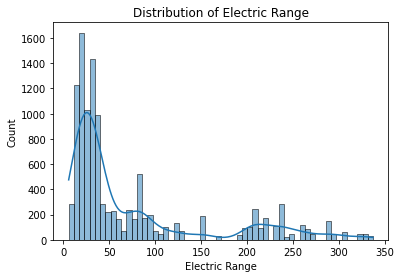

In [0]:
sns.histplot(pandas_df['Electric Range'], kde=True)
plt.title('Distribution of Electric Range')
plt.show()


#Distribution of Electric Range

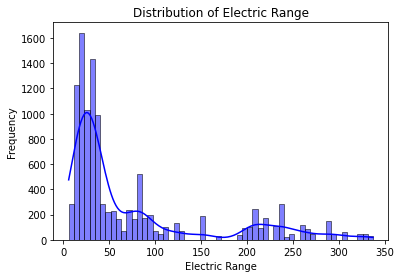

In [0]:
sns.histplot(pandas_df['Electric Range'], kde=True, color='blue')
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()

 Boxplot of Base MSRP

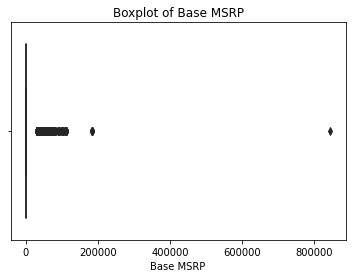

In [0]:
sns.boxplot(x=pandas_df['Base MSRP'], color='green')
plt.title('Boxplot of Base MSRP')
plt.show()

Count Plot of Make

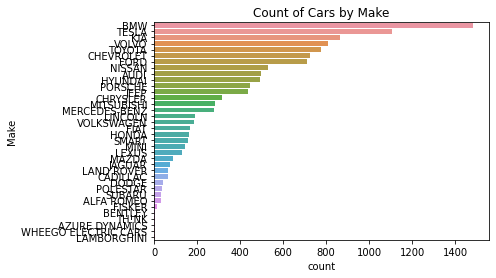

In [0]:
sns.countplot(y="Make", data=pandas_df, order=pandas_df['Make'].value_counts().index)
plt.title('Count of Cars by Make')
plt.show()

Outlier Detection
# Boxplot for Outliers

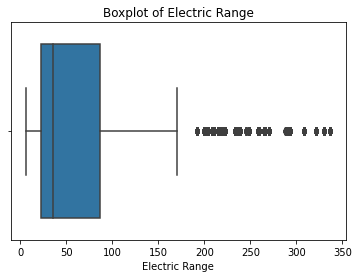

In [0]:
sns.boxplot(x=pandas_df['Electric Range'])
plt.title('Boxplot of Electric Range')
plt.show()

 Data Transformation
# Add a Derived Column

In [0]:
df_transformed = df_cleaned.withColumn("new_column", col("Electric Range") * 10)


In [0]:
df_transformed = df_cleaned.withColumn("MSRP_Range", expr("`Base MSRP` * `Electric Range` / 100"))


In [0]:
final_df = df_transformed.select("Make", "Model Year", "Electric Range", "Base MSRP", "MSRP_Range")
final_df.show(5)

+---------+----------+--------------+---------+----------+
|     Make|Model Year|Electric Range|Base MSRP|MSRP_Range|
+---------+----------+--------------+---------+----------+
|    TESLA|      2018|           249|        0|       0.0|
|CHEVROLET|      2014|            38|        0|       0.0|
|   NISSAN|      2020|           149|        0|       0.0|
|   TOYOTA|      2017|            25|        0|       0.0|
|   NISSAN|      2013|            75|        0|       0.0|
+---------+----------+--------------+---------+----------+
only showing top 5 rows



Correlation Analysis
# Pairwise correlation between numerical features

In [0]:
numerical_columns = [c[0] for c in df_cleaned.dtypes if c[1] in ['int', 'double']]

for col_name in numerical_columns:
    for other_col in numerical_columns:
        if col_name != other_col:
            corr = df_cleaned.stat.corr(col_name, other_col)
            print(f"Correlation between {col_name} and {other_col}: {corr}")


Correlation between Model Year and Electric Range: -0.16239851894129512
Correlation between Model Year and Base MSRP: -0.19480038195268398
Correlation between Model Year and Legislative District: 0.002338827880396423
Correlation between Electric Range and Model Year: -0.1623985189412951
Correlation between Electric Range and Base MSRP: 0.023939469373412525
Correlation between Electric Range and Legislative District: -0.01299249408443137
Correlation between Base MSRP and Model Year: -0.19480038195268393
Correlation between Base MSRP and Electric Range: 0.02393946937341253
Correlation between Base MSRP and Legislative District: 0.01199839011232686
Correlation between Legislative District and Model Year: 0.0023388278803966674
Correlation between Legislative District and Electric Range: -0.012992494084431374
Correlation between Legislative District and Base MSRP: 0.011998390112326857


Save Cleaned Data

In [0]:
df_transformed.write.format("parquet").mode("overwrite").save("/dbfs/FileStore/data/cleaned_data.parquet")
